In [35]:
import math, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing


In [36]:
df = pd.read_csv('iris.txt',delim_whitespace=True,index_col='ID')
#df= pd.DataFrame(l,columns=head)
df=df.iloc[:,[0,1,2,3]]

In [37]:
#On centre les variables :
scaled_data = preprocessing.scale(df.T)
#On cree un pca :
pca = PCA()
pca_data = pca.fit_transform(scaled_data.T)


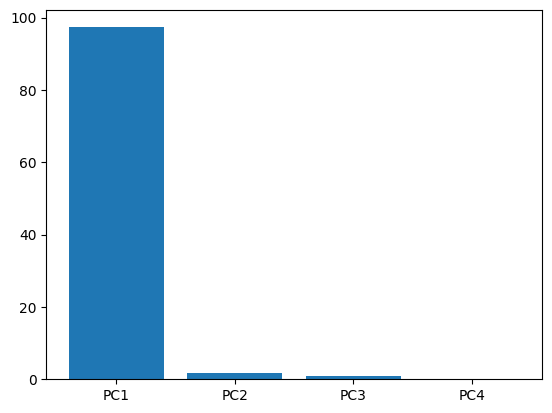

In [72]:
#Pour choisir le nombre de composantes principales, on calcule
#le pourcentage de variations pour chaque composantes principales:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels= ['PC'+str(x) for x in range(1,len(per_var)+1)]
#On cree un diagramme a barres :
plt.bar(x= range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.show()

Donc les deux premieres composantes principales sont suffisantes pour 
avoir une bonne representaions des données

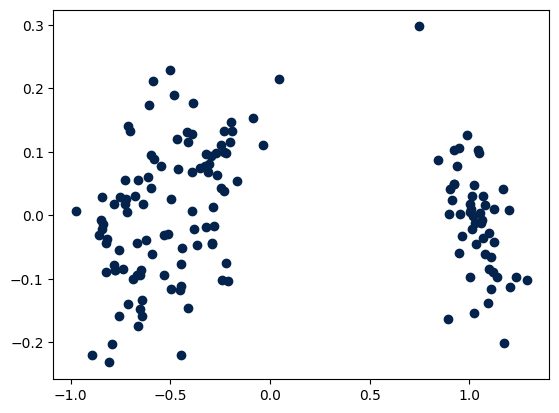

In [39]:
pca_df = pd.DataFrame(pca_data)
plt.scatter(pca_df[0],pca_df[1],c='#03224c')
plt.show()

On voit bien ici qu'il y a deux clusters, 
Verifions ce résultat avec le clustering itératif

Clustering iteratif :

In [97]:
#Centroid of np.array
def centroid(l):
    indexes={}
    temp_num =0
    resultat =[]
    temp_alpha={}
    for i in range(len(l[0])): #Parcours des attributs
        indexes[i]=0
        for t in l :
            if str(t[i]).isnumeric() :
                temp_num+=float(t[i])
            else :
                if str(t[i]) in temp_alpha :
                    temp_alpha[t[i]]+=1

                else :
                    temp_alpha[t[i]]=1
            if str(t[i]).isnumeric():
                indexes[i]+=temp_num/len(l)
                temp_num=0
            else :
                if temp_alpha != {} :
                    sorted(temp_alpha.items(), key=lambda x: x[1], reverse=True) 
                    indexes[i]=sorted(temp_alpha.items(), key=lambda x: x[1],reverse=True)[0][0] #Hna nahina list()
                
                temp_alpha={}

        temp_num=0
        sorted(indexes.items(), key=lambda x: x[0])
    for i in indexes.keys() :
        resultat.append(indexes[i])

    resultat_string = map(str, resultat)

    return list(resultat)
#print(scaled_data.T[0])
s_list = scaled_data.values.tolist()

def dist_auto(s_list) :
    dist_moy = 0
    x=1
    for e in s_list :
        for i in range(x,len(s_list)) :
            dist_moy += math.dist(e,s_list[i])/len(s_list)
            x+=1
    return dist_moy

#print(dist_auto(s_list))


def clustering_iteratif (l,min_dist) :
    #Les clusters sont stockés dans le dictionnaire suivant:
    #Chaque cluster est carecterisé par une liste d'items faisant partie de ce cluster ainsi qu'un centroide
    clusters ={}
    #On initialise le dictionnaire des clusters avec un premier cluster c1
    #On initialise le centroide par le premier item de la liste
    #On initialise la liste d'items par le premier item de la liste
    clusters["c1"]={
        'centroid':l[0],
        'items': [l[0],]
    }
    
    for i in range(1,len(l)) : #On parcours la liste a partir du deuxieme item
        #print("Iteration : "+str(i))
        clusters_candidats=[] #On initialise une liste de clusters candidats
        for c in clusters.keys() :#On parcours la liste des clusters 
            #Si la math.dist entre le centroide du cluster et le tuple entrant dans cette iteration est <= a la math.dist minimale (critere d'acceptation)
            #alors, ce cluster est candidat
            # print(list(clusters[c]['centroid']))
            # print(l[i])
            if math.dist(l[i],list(clusters[c]['centroid']))<=min_dist :
                clusters_candidats.append(c)

    #Si il y a bien des clusters candidats, on choisi celui dont le centroide est le plus proche de notre item
        if clusters_candidats!=[] :
            dmin= math.dist(l[i],list(clusters[clusters_candidats[0]]['centroid'])) #On initialise la math.dist minimale
            cluster_min = clusters_candidats[0] #On initialise le cluster minimal
            for candidat in clusters_candidats :
                if math.dist(l[i],list(clusters[candidat]['centroid'])) <= dmin :
                    dmin=math.dist(l[i],list(clusters[candidat]['centroid']))
                    cluster_min = candidat
            
            #if l[i] not in clusters[cluster_min]['items'] :

            #On ajoute le tuple au cluster minimum trouvé
            clusters[cluster_min]['items'].append(l[i])
            #On met a jour le centroide du cluster
            clusters[cluster_min]['centroid']=centroid(clusters[cluster_min]['items'])
        
        #Si il n'y a pas de clusters candidats, autrement dit, tous les clusters disponibles sont eloignés de notre item
        #dans ce cas on crée un nouveau cluster
        else :
            x=len(clusters.keys())+1 #Indice du nouveau cluster
            clusters["c"+str(x)]={
                'items': [l[i],],
                'centroid': l[i]
            }
            

    return clusters

#print(s_list)

print(clustering_iteratif(s_list,dist_auto(s_list)).keys())
print("Distance automatique: "+str(dist_auto(s_list)))
#s_list


dict_keys(['c1', 'c2'])
Distance automatique: 1.0989382219838135
